In [1]:
!unzip /content/drive/MyDrive/ml-100k.zip

Archive:  /content/drive/MyDrive/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings_df = pd.read_csv('/content/ml-100k/u.data', sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [4]:
item_df = pd.read_csv('/content/ml-100k/u.item', sep='|', header=None, encoding='latin-1',
                      names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
                             'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                             'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])


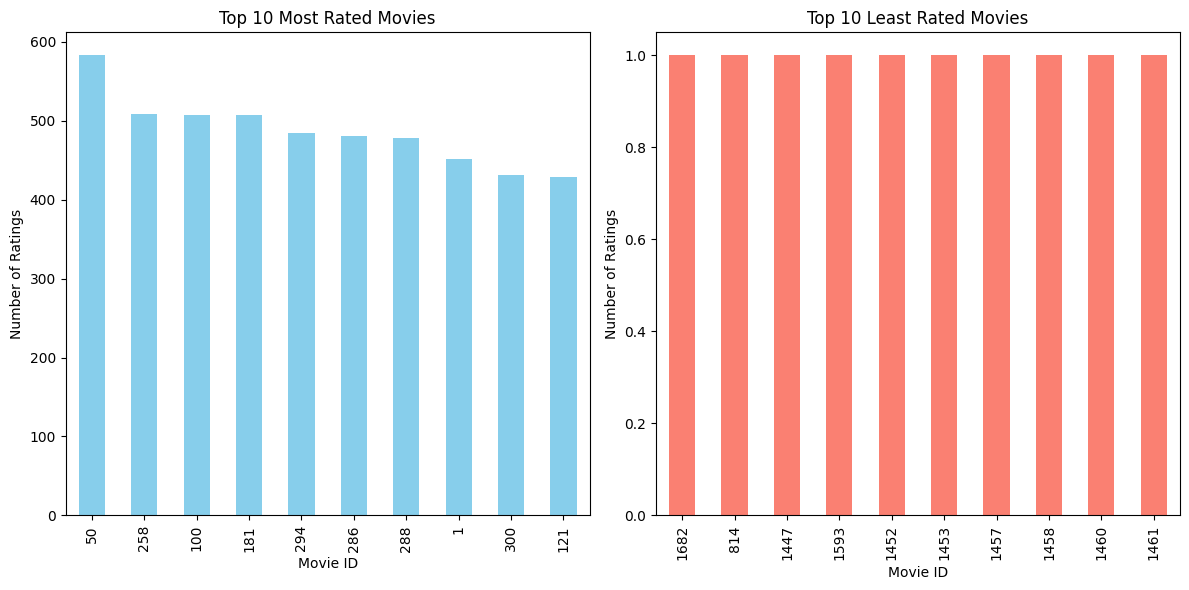

In [8]:
# This graph could show that what most and least popular movies in dataset

most_rated_movies = ratings_df.groupby('movie_id')['user_id'].count().sort_values(ascending=False).head(10)
least_rated_movies = ratings_df.groupby('movie_id')['user_id'].count().sort_values().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
most_rated_movies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')

plt.subplot(1, 2, 2)
least_rated_movies.plot(kind='bar', color='salmon')
plt.title('Top 10 Least Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')

plt.tight_layout()
plt.show()


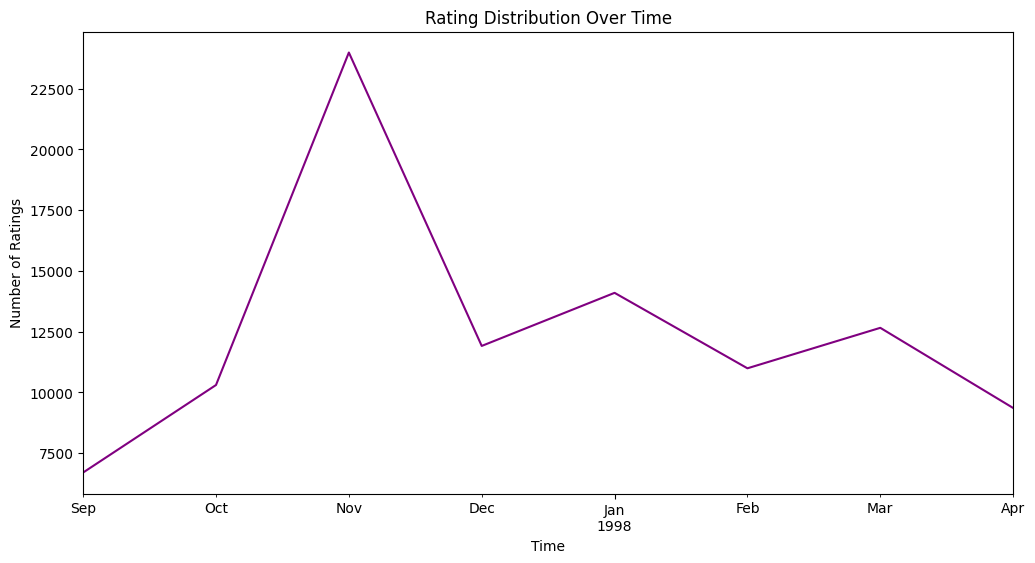

In [10]:
# Just interesting data

# Rating Distribution Over Time
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_over_time = ratings_df.set_index('timestamp')['rating']

# Plotting Rating Distribution Over Time
plt.figure(figsize=(12, 6))
ratings_over_time.resample('M').count().plot(color='purple')
plt.title('Rating Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()


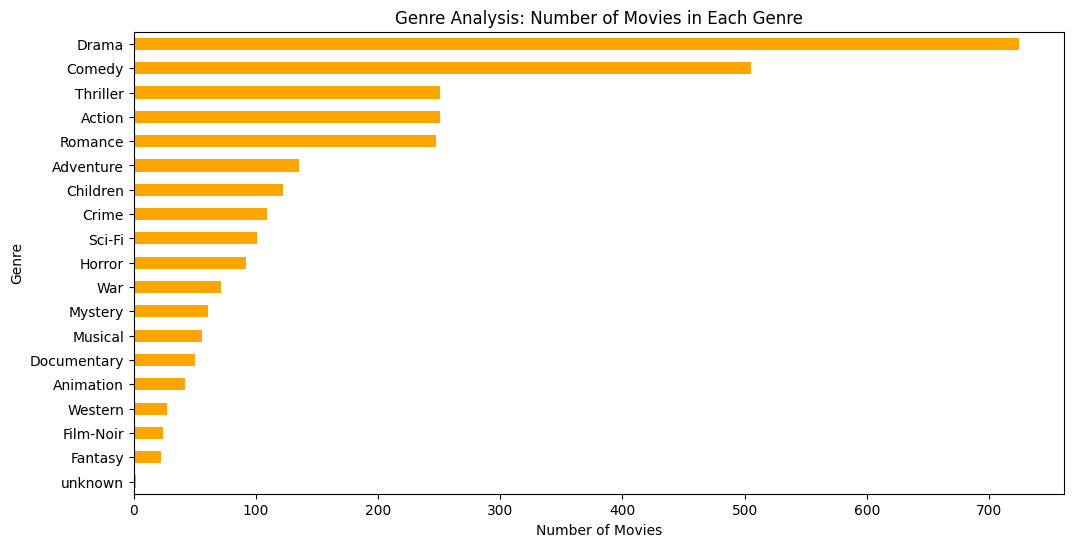

In [11]:
# Genre Analysis
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Extract genres from item_df
genre_counts = item_df[genre_columns].sum()

# Plotting Genre Analysis
plt.figure(figsize=(12, 6))
genre_counts.sort_values().plot(kind='barh', color='orange')
plt.title('Genre Analysis: Number of Movies in Each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


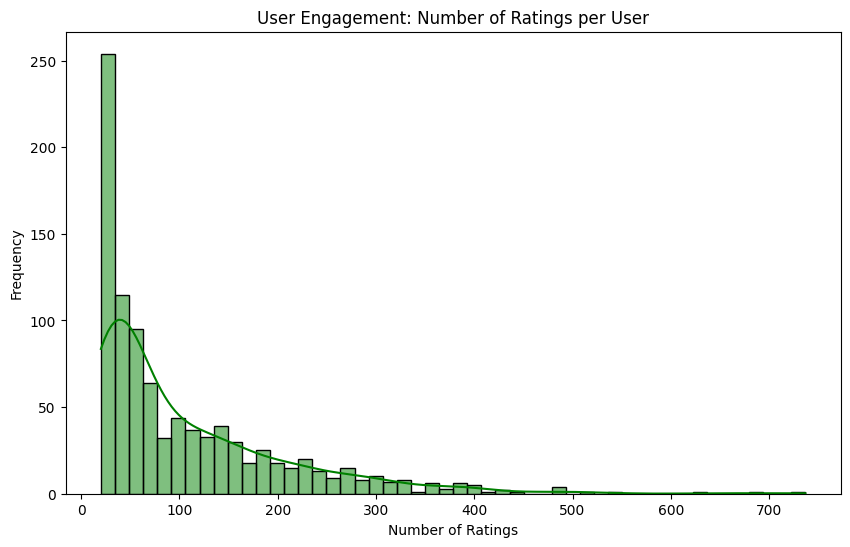

In [12]:
# User Engagement
user_ratings_count = ratings_df.groupby('user_id')['rating'].count()

# Plotting User Engagement
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True, color='green')
plt.title('User Engagement: Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()